In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 读取数据
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

# pca
def pca(dataMat, topNfeat=9999999):
    # 提前进行均值化，用于后面求协方差
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=False)  # 求协方差矩阵
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))  # 求特征值和特征向量
    eigValInd = np.argsort(eigVals)   # 对特征值进行排序，默认是对行进行，默认也是从小到大排序         
    eigValInd = eigValInd[:-(topNfeat+1):-1]  # 返回特征向量，如果不对topNfeat进行设置则返回全部特征向量，-1是倒序输出因为上面是从小到大排序的
    redEigVects = eigVects[:,eigValInd]       # 取出1个或若干个特征向量
    lowDDataMat = meanRemoved * redEigVects   # 对原数据进行线性变换，即降维
    reconMat = (lowDDataMat * redEigVects.T) + meanVals  # 对转换后的数据进行重构，lowDDataMat * redEigVects.T即还原到原始的坐标空间，再+均值还原用于可视化对比
    return lowDDataMat, reconMat

In [19]:
data = loadDataSet("testSet.txt")
print(data.shape)  # 原数据为1000个样本数，2个特征维
new_data, reconmat = pca(data, 1)
print(np.shape(new_data))  # pca降维之后，只有一个特征维
# 其实打开数据txt就可以发现，两个特征维度基本一致、是相关的、冗余的，所以pca就很好的去除了一个没用的维

(1000, 2)
(1000, 1)


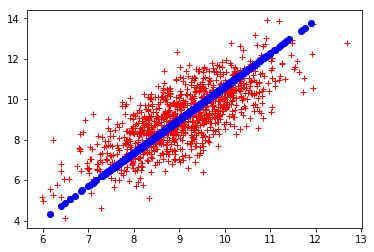

In [20]:
# 可视化
data = loadDataSet("testSet.txt")
plt.plot(data[:, 0], data[:, 1], "r+")
plt.plot(reconmat[:, 0], reconmat[:, 1], "bo")
plt.show()

PCA本质上是将方差最大的方向作为主要特征，并且在各个正交方向上将数据“离相关”，也就是让它们在不同正交方向上没有相关性.